In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [124]:
pvar_f <- '/oak/stanford/groups/mrivas/ukbb24983/array-combined/pgen/ukb24983_cal_hla_cnv.pvar'
afreq_f <- file.path(dirname(dirname(pvar_f)), 'annotation/afreq_20201012/ukb24983_cal_hla_cnv.afreq_20201012.pvar.zst')
old_cal_annot_f <- '/oak/stanford/groups/mrivas/private_data/ukbb/variant_filtering/variant_filter_table.20200701.tsv.gz'
cal_annot_f <- '/oak/stanford/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'
cnv_annot_f <- '/oak/stanford/groups/mrivas/ukbb24983/cnv/annotation_20201003/cnv.vep101-loftee.20201009.Csq.tsv.gz'
# snp_qc_f <- '/oak/stanford/groups/mrivas/ukbb24983/snp/ukb_snp_qc.pvar.zst'


In [98]:
cat_or_zcat <- function(f){
    ifelse(endsWith(f, '.zst'), 'zstdcat', ifelse(endsWith(f, '.gz'), 'zcat', 'cat'))
}

fread_CHROM <- function(f){
    fread(cmd=paste(cat_or_zcat(f), f), colClasses = c('#CHROM'='character')) %>% rename('CHROM'='#CHROM')
}


In [99]:
snp_qc_f %>% fread_CHROM() -> snp_qc_df

In [16]:
cal_annot_f %>% fread_CHROM() -> cal_annot_df
cnv_annot_f %>% fread_CHROM() -> cnv_annot_df


In [125]:
afreq_f %>% fread_CHROM() -> afreq_df


In [126]:
afreq_df %>% colnames()

[1] "CHROM"                                 
 [2] "POS"                                   
 [3] "ID"                                    
 [4] "REF"                                   
 [5] "ALT"                                   
 [6] "array"                                 
 [7] "UKB_AF"                                
 [8] "UKB_white_british_AF"                  
 [9] "UKB_non_british_white_AF"              
[10] "UKB_african_AF"                        
[11] "UKB_s_asian_AF"                        
[12] "UKB_e_asian_AF"                        
[13] "UKB_related_AF"                        
[14] "UKB_others_AF"                         
[15] "UKB_OBS_CT"                            
[16] "UKB_white_british_OBS_CT"              
[17] "UKB_non_british_white_OBS_CT"          
[18] "UKB_african_OBS_CT"                    
[19] "UKB_s_asian_OBS_CT"                    
[20] "UKB_e_asian_OBS_CT"                    
[21] "UKB_related_OBS_CT"                    
[22] "UKB_others_OBS_CT"                     
[23] "UKB_UKBB_OBS_CT"                       
[24] "UKB_UKBL_OBS_CT"                       
[25] "UKB_MISSING_CT"                        
[26] "UKB_white_british_MISSING_CT"          
[27] "UKB_non_british_white_MISSING_CT"      
[28] "UKB_african_MISSING_CT"                
[29] "UKB_s_asian_MISSING_CT"                
[30] "UKB_e_asian_MISSING_CT"                
[31] "UKB_related_MISSING_CT"                
[32] "UKB_others_MISSING_CT"                 
[33] "UKB_UKBB_MISSING_CT"                   
[34] "UKB_UKBL_MISSING_CT"                   
[35] "UKB_HOM_REF_CT"                        
[36] "UKB_white_british_HOM_REF_CT"          
[37] "UKB_non_british_white_HOM_REF_CT"      
[38] "UKB_african_HOM_REF_CT"                
[39] "UKB_s_asian_HOM_REF_CT"                
[40] "UKB_e_asian_HOM_REF_CT"                
[41] "UKB_related_HOM_REF_CT"                
[42] "UKB_others_HOM_REF_CT"                 
[43] "UKB_HET_REF_ALT_CTS"                   
[44] "UKB_white_british_HET_REF_ALT_CTS"     
[45] "UKB_non_british_white_HET_REF_ALT_CTS" 
[46] "UKB_african_HET_REF_ALT_CTS"           
[47] "UKB_s_asian_HET_REF_ALT_CTS"           
[48] "UKB_e_asian_HET_REF_ALT_CTS"           
[49] "UKB_related_HET_REF_ALT_CTS"           
[50] "UKB_others_HET_REF_ALT_CTS"            
[51] "UKB_TWO_ALT_GENO_CTS"                  
[52] "UKB_white_british_TWO_ALT_GENO_CTS"    
[53] "UKB_non_british_white_TWO_ALT_GENO_CTS"
[54] "UKB_african_TWO_ALT_GENO_CTS"          
[55] "UKB_s_asian_TWO_ALT_GENO_CTS"          
[56] "UKB_e_asian_TWO_ALT_GENO_CTS"          
[57] "UKB_related_TWO_ALT_GENO_CTS"          
[58] "UKB_others_TWO_ALT_GENO_CTS"           
[59] "UKB_HAP_REF_CT"                        
[60] "UKB_white_british_HAP_REF_CT"          
[61] "UKB_non_british_white_HAP_REF_CT"      
[62] "UKB_african_HAP_REF_CT"                
[63] "UKB_s_asian_HAP_REF_CT"                
[64] "UKB_e_asian_HAP_REF_CT"                
[65] "UKB_related_HAP_REF_CT"                
[66] "UKB_others_HAP_REF_CT"                 
[67] "UKB_HAP_ALT_CTS"                       
[68] "UKB_white_british_HAP_ALT_CTS"         
[69] "UKB_non_british_white_HAP_ALT_CTS"     
[70] "UKB_african_HAP_ALT_CTS"               
[71] "UKB_s_asian_HAP_ALT_CTS"               
[72] "UKB_e_asian_HAP_ALT_CTS"               
[73] "UKB_related_HAP_ALT_CTS"               
[74] "UKB_others_HAP_ALT_CTS"                
[75] "f_miss"                                
[76] "f_miss_UKBB"                           
[77] "f_miss_UKBL"

In [21]:
pvar_f %>% fread_CHROM() -> pvar_df
old_cal_annot_f %>% fread_CHROM() -> old_cal_annot_f


In [123]:
snp_qc_df %>% count(array)

array,n
<int>,<int>
0,17536
1,34197
2,753693


In [127]:
afreq_df %>% count(array)

array,n
<chr>,<int>
both,753693
UKBB,34197
UKBL,17536
NA,275542


In [ ]:
[ytanigaw@sh02-09n54 /oak/stanford/groups/mrivas/ukbb24983/sqc/population_stratification_w24983_20200828]$ cat ukb24983_master_sqc.20200828.phe | cut -f8 | sort6 | uniq -c
      1 genotyping_array
 438427 UKBB
  49950 UKBL

In [19]:
setdiff(colnames(cal_annot_df), colnames(cnv_annot_df))

character(0)

In [20]:
setdiff(colnames(cnv_annot_df), colnames(cal_annot_df))

[1] "POS_s"      "POS_e"      "pvar_order"

In [106]:
old_cal_annot_df %>%
select(ID, freq, maf) %>%
left_join(
    afreq_df %>% select(ID, UKB_AF, UKB_white_british_AF), 
    by='ID'
) -> tmp


In [110]:
tmp %>%
filter(maf != freq) %>%
dim()

[1] 0 5

In [109]:
tmp %>%
filter(maf > .5) %>%
dim()

[1] 0 5

In [108]:
tmp %>%
filter(UKB_AF > .5) %>%
dim()

[1] 101730      5

In [116]:
tmp %>%
head() %>%
mutate(
    UKB_MAF = pmin(UKB_AF, 1 - UKB_AF)
)

ID,freq,maf,UKB_AF,UKB_white_british_AF,UKB_MAF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs28659788,0.03614952,0.03614952,0.0368601,0.0361564,0.0368601
rs116587930,0.05360614,0.05360614,0.0509576,0.0536004,0.0509576
rs116720794,0.03658726,0.03658726,0.0375313,0.0365897,0.0375313
rs3131972,0.15681154,0.15681154,0.8290750,0.8431890,0.1709250
rs12184325,0.03652657,0.03652657,0.0374347,0.0365292,0.0374347
rs3131962,0.12983398,0.12983398,0.8600440,0.8701680,0.1399560


Warning message:
“Removed 2279 rows containing missing values (geom_point).”


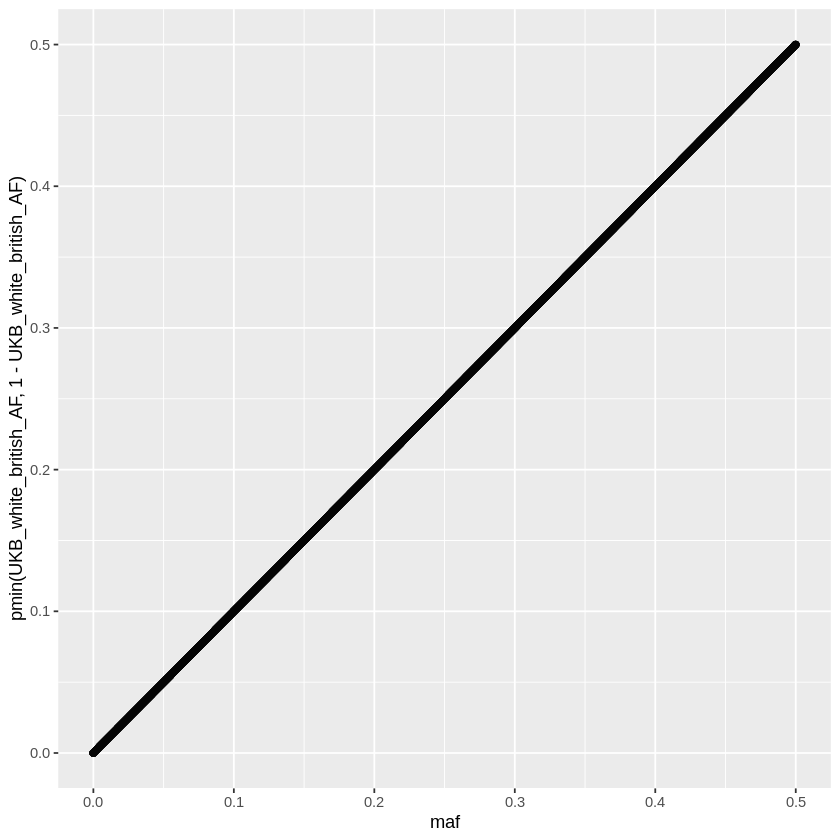

In [118]:
tmp %>%
ggplot(aes(x = maf, y = pmin(UKB_white_british_AF, 1 - UKB_white_british_AF))) +
geom_point(alpha=.1)

In [102]:
afreq_df %>%
head()

CHROM,POS,ID,REF,ALT,UKB_AF,UKB_white_british_AF,UKB_non_british_white_AF,UKB_african_AF,UKB_s_asian_AF,⋯,UKB_related_HAP_REF_CT,UKB_others_HAP_REF_CT,UKB_HAP_ALT_CTS,UKB_white_british_HAP_ALT_CTS,UKB_non_british_white_HAP_ALT_CTS,UKB_african_HAP_ALT_CTS,UKB_s_asian_HAP_ALT_CTS,UKB_e_asian_HAP_ALT_CTS,UKB_related_HAP_ALT_CTS,UKB_others_HAP_ALT_CTS
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,723307,rs28659788,C,G,3.68601e-02,3.61564e-02,3.91005e-02,NA,NA,⋯,0,0,0,0,0,0,0,0,0,0
1,727841,rs116587930,G,A,5.09576e-02,5.36004e-02,5.19909e-02,5.50474e-03,0.0144177,⋯,0,0,0,0,0,0,0,0,0,0
1,729632,rs116720794,C,T,3.75313e-02,3.65897e-02,4.28314e-02,2.65188e-02,0.0463466,⋯,0,0,0,0,0,0,0,0,0,0
1,751314,1:723307-779322_-,N,+,2.07153e-06,1.50034e-06,0.00000e+00,7.77122e-05,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
1,751315,1:723307-779322_+,N,+,1.03577e-06,0.00000e+00,2.03161e-05,0.00000e+00,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
1,752721,rs3131972,A,G,8.29075e-01,8.43189e-01,8.33515e-01,2.75031e-01,0.7735750,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
setdiff(colnames(old_cal_annot_df), colnames(cal_annot_df))

[1] "consequence_field" "f_miss"            "f_miss_bileve"    
 [4] "f_miss_wcsg"       "freq"              "hwe_p"            
 [7] "maf"               "ld_indep"          "wcsg_only"        
[10] "bileve_only"       "filter"            "missingness"      
[13] "hwe"               "mcpi"              "gnomad_af"        
[16] "mgi"               "mgi_notes"         "all_filters"      
[19] "Gene_symbol"

- `consequence_field`: the consequence string (from VEP?) that concatenates a lot of fields with `|`
- `f_miss`: missing rate
- `f_miss_bileve`: missing rate in UKBL array
- `f_miss_wcsg`: missing rate in UKBB array
- `freq`: allele frequency
- `hwe_p`: HWE test p-value
- `maf`: MAF
- `ld_indep`: LD independence flag
- `wcsg_only`
- `bileve_only`
- `filter`: QC filter? it's always `.`
- `missingness`: QC filter - missingness
- `hwe`: QC filter - HWE p-value
- `mcpi`: QC filter: manual cluster plot inspection
- `gnomad_af`: QC filter - maf comparison with gnomAD
- `mgi`: QC filter - manual ??
- `mgi_notes`: QC filter - notes
- `all_filters`: QC filter summary
- `Gene_symbol`: the gene symbol


In [27]:
setdiff(colnames(cal_annot_df), colnames(old_cal_annot_df))

[1] "Allele"                "IMPACT"                "SYMBOL"               
 [4] "Feature_type"          "Feature"               "BIOTYPE"              
 [7] "EXON"                  "INTRON"                "HGVSc"                
[10] "cDNA_position"         "CDS_position"          "Protein_position"     
[13] "Amino_acids"           "Codons"                "Existing_variation"   
[16] "ALLELE_NUM"            "DISTANCE"              "STRAND"               
[19] "FLAGS"                 "VARIANT_CLASS"         "SYMBOL_SOURCE"        
[22] "HGNC_ID"               "CANONICAL"             "MANE"                 
[25] "TSL"                   "APPRIS"                "CCDS"                 
[28] "ENSP"                  "SWISSPROT"             "TREMBL"               
[31] "UNIPARC"               "GENE_PHENO"            "SIFT"                 
[34] "PolyPhen"              "DOMAINS"               "miRNA"                
[37] "HGVS_OFFSET"           "AF"                    "AFR_AF"               
[40] "AMR_AF"                "EAS_AF"                "EUR_AF"               
[43] "SAS_AF"                "AA_AF"                 "EA_AF"                
[46] "gnomAD_AF"             "gnomAD_AFR_AF"         "gnomAD_AMR_AF"        
[49] "gnomAD_ASJ_AF"         "gnomAD_EAS_AF"         "gnomAD_FIN_AF"        
[52] "gnomAD_NFE_AF"         "gnomAD_OTH_AF"         "gnomAD_SAS_AF"        
[55] "MAX_AF"                "MAX_AF_POPS"           "CLIN_SIG"             
[58] "SOMATIC"               "PHENO"                 "PUBMED"               
[61] "VAR_SYNONYMS"          "MOTIF_NAME"            "MOTIF_POS"            
[64] "HIGH_INF_POS"          "MOTIF_SCORE_CHANGE"    "TRANSCRIPTION_FACTORS"
[67] "Csq"

In [64]:
old_cal_annot_df %>%
count(CHROM %in% c('X', 'Y', 'MT', 'XY'), is.na(all_filters))

"CHROM %in% c(""X"", ""Y"", ""MT"", ""XY"")",is.na(all_filters),n
<lgl>,<lgl>,<int>
FALSE,FALSE,784256
TRUE,TRUE,19813


In [61]:
old_cal_annot_df %>%
count(all_filters, missingness, hwe, mcpi, gnomad_af, mgi)

all_filters,missingness,hwe,mcpi,gnomad_af,mgi,n
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
0,0,0,0,,,651983
0,0,0,0,,NOT_PTV,29
0,0,0,0,,PASS,53
0,0,0,0,PASS,,3589
1,0,0,0,,FAIL,41
1,0,0,0,FAIL,,166
1,0,0,1,,,5
1,0,0,1,PASS,,5
1,0,1,0,,,34200


In [57]:
old_cal_annot_df %>%
mutate(
    FILTER = str_replace(paste0(
        if_else(is.na(missingness) | missingness == 0, '', 'missingness;'),
        if_else(is.na(hwe) | hwe == 0, '', 'hwe;'),
        if_else(is.na(mcpi) | mcpi == 0, '', 'mcpi;'),
        if_else(is.na(gnomad_af) | gnomad_af %in% c('', 'PASS'), '', 'gnomad_af;'),
        if_else(is.na(mgi) | mgi %in% c('', 'PASS', 'NOT_PTV'), '', 'mgi;')
    ), ';$', '')
) %>%
count(all_filters, FILTER, filter)

all_filters,FILTER,filter,n
<int>,<chr>,<lgl>,<int>
0,,NA,655654
1,gnomad_af,NA,166
1,hwe,NA,34262
1,mcpi,NA,10
1,mgi,NA,41
1,missingness,NA,71768
2,hwe;gnomad_af,NA,4
2,hwe;mgi,NA,3
2,missingness;gnomad_af,NA,38


In [62]:
old_annot_df %>%
count(mgi_notes)

mgi_notes,n
<chr>,<int>
,803983
does not match anything in gnomad; possibly typing another allele,1
likely typing 11:704604 GA / G (rs769840755),1
likely typing different PTV,1
likely typing frameshift indel 1bp away,1
likely typing inframe deletion,2
likely typing missense,1
likely typing missense variant,4
likely typing neighboring frameshift indel 1:145586671,1


In [63]:
old_annot_df %>%
count(wcsg_only, bileve_only)

wcsg_only,bileve_only,n
<lgl>,<lgl>,<int>
FALSE,FALSE,732880
FALSE,TRUE,17103
TRUE,FALSE,34273
NA,NA,19813


In [77]:
snp_qc_df %>% count(array)


array,n
<int>,<int>
0,17536
1,34197
2,753693


In [82]:
old_annot_df %>% count(CHROM)

CHROM,n
<chr>,<int>
1,63487
10,38308
11,40824
12,37302
13,26806
14,25509
15,24467
16,28960
17,28835


In [84]:
snp_qc_df %>% 
mutate(CHROM = if_else(chromosome == '23', 'X', if_else(chromosome == '24', 'Y', if_else(chromosome == '25', 'X', if_else(chromosome == '26', 'MT', chromosome))))) %>%
count(chromosome, CHROM)

chromosome,CHROM,n
<chr>,<chr>,<int>
1,1,63487
10,10,38308
11,11,40824
12,12,37302
13,13,26806
14,14,25509
15,15,24467
16,16,28960
17,17,28835


In [79]:
old_annot_df%>% filter(ID == 'rs869183622') %>% head()

CHROM,POS,REF,ALT,ID,Gene,Consequence,HGVSp,LoF,LoF_filter,⋯,bileve_only,filter,missingness,hwe,mcpi,gnomad_af,mgi,mgi_notes,all_filters,Gene_symbol
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
MT,73,A,G,rs869183622,"ENSG00000210100,ENSG00000210112,ENSG00000210077,ENSG00000211459,ENSG00000209082,ENSG00000198763,ENSG00000210082,ENSG00000210049,ENSG00000198888",upstream_gene_variant,,,,⋯,NA,NA,NA,NA,NA,,,,NA,"MT-ND1,MT-ND2,MT-TL1,MT-TV,MT-RNR1,MT-RNR2,MT-TM,MT-TI,MT-TF"


In [78]:
setdiff(old_annot_df$ID, snp_qc_df$rs_id) %>% head()

[1] "rs869183622" "rs62581312"  "rs41323649"  "rs3937037"   ""           
[6] "rs2853515"

In [95]:
old_annot_df %>%
count(ld_indep)

ld_indep,n
<lgl>,<int>
FALSE,422831
TRUE,361425
NA,19813


In [86]:
old_annot_df %>%
colnames()

[1] "CHROM"             "POS"               "REF"              
 [4] "ALT"               "ID"                "Gene"             
 [7] "Consequence"       "HGVSp"             "LoF"              
[10] "LoF_filter"        "LoF_flags"         "LoF_info"         
[13] "consequence_field" "f_miss"            "f_miss_bileve"    
[16] "f_miss_wcsg"       "freq"              "hwe_p"            
[19] "maf"               "ld_indep"          "wcsg_only"        
[22] "bileve_only"       "filter"            "missingness"      
[25] "hwe"               "mcpi"              "gnomad_af"        
[28] "mgi"               "mgi_notes"         "all_filters"      
[31] "Gene_symbol"

In [94]:
old_annot_df %>%
select(CHROM, POS, REF, ALT, wcsg_only, bileve_only) %>%
left_join(
    snp_qc_df %>% 
    mutate(CHROM = if_else(chromosome == '23', 'X', if_else(chromosome == '24', 'Y', if_else(chromosome == '25', 'X', if_else(chromosome == '26', 'MT', chromosome))))) %>%
    select(CHROM, position, allele1_ref, allele2_alt, array),
    by=c('CHROM'='CHROM', 'POS'='position', 'REF'='allele1_ref', 'ALT'='allele2_alt')
) %>%
count(array)

array,n
<int>,<int>
0,17526
1,34192
2,752351


In [72]:
old_annot_df %>%
select(ID, wcsg_only, bileve_only) %>%
left_join(
    snp_qc_df %>% select(rs_id, array),
    by=c('ID'='rs_id')
) %>%
count(wcsg_only, bileve_only, array)

wcsg_only,bileve_only,array,n
<lgl>,<lgl>,<int>,<int>
FALSE,FALSE,2,732880
FALSE,TRUE,0,17103
TRUE,FALSE,1,33831
TRUE,FALSE,2,442
NA,NA,0,278
NA,NA,1,99
NA,NA,2,17157
NA,NA,NA,2279


In [26]:
old_cal_annot_df %>%
select(all_of(setdiff(colnames(old_cal_annot_df), colnames(cal_annot_df)))) %>%
select(-consequence_field) %>%
head()

f_miss,f_miss_bileve,f_miss_wcsg,freq,hwe_p,maf,ld_indep,wcsg_only,bileve_only,filter,missingness,hwe,mcpi,gnomad_af,mgi,mgi_notes,all_filters,Gene_symbol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
0.891500,0.011990,1.000000,0.03614952,4.459e-22,0.03614952,FALSE,FALSE,TRUE,NA,1,1,0,,,,2,AL669831.5
0.099850,0.126300,0.096580,0.05360614,0.000e+00,0.05360614,FALSE,FALSE,FALSE,NA,1,1,0,,,,2,AL669831.5
0.044820,0.107900,0.037040,0.03658726,7.009e-195,0.03658726,FALSE,FALSE,FALSE,NA,1,1,0,,,,2,AL669831.5
0.005184,0.003537,0.005387,0.15681154,1.554e-266,0.15681154,FALSE,FALSE,FALSE,NA,0,1,0,,,,1,RP11-206L10.10
0.001100,0.001269,0.001079,0.03652657,4.046e-198,0.03652657,FALSE,FALSE,FALSE,NA,0,1,0,,,,1,FAM87B
0.001874,0.004130,0.001596,0.12983398,2.418e-02,0.12983398,FALSE,FALSE,FALSE,NA,0,0,0,,,,0,RP11-206L10.10


In [69]:
snp_qc_df %>%
head()

rs_id,affymetrix_snp_id,affymetrix_probeset_id,chromosome,position,allele1_ref,allele2_alt,strand,array,Batch_b001_qc,⋯,PC32_loading,PC33_loading,PC34_loading,PC35_loading,PC36_loading,PC37_loading,PC38_loading,PC9_loading,PC40_loading,in_Phasing_Input
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs28659788,Affx-13546538,AX-32115783,1,723307,C,G,+,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
rs116587930,Affx-35298040,AX-37361813,1,727841,G,A,+,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
rs116720794,Affx-13637449,AX-32137419,1,729632,C,T,+,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
rs3131972,Affx-13945728,AX-13191280,1,752721,A,G,+,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
rs12184325,Affx-13963217,AX-11194291,1,754105,C,T,+,2,1,⋯,-0.00347144,0.00589896,-0.00373881,-0.00189571,-0.00286888,0.000792278,-0.00191024,0.00307453,-0.000410934,1
rs3131962,Affx-13995532,AX-32225497,1,756604,A,G,+,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


In [74]:
snp_qc_df %>%
colnames()

[1] "rs_id"                  "affymetrix_snp_id"      "affymetrix_probeset_id"
  [4] "chromosome"             "position"               "allele1_ref"           
  [7] "allele2_alt"            "strand"                 "array"                 
 [10] "Batch_b001_qc"          "Batch_b002_qc"          "Batch_b003_qc"         
 [13] "Batch_b004_qc"          "Batch_b005_qc"          "Batch_b006_qc"         
 [16] "Batch_b007_qc"          "Batch_b008_qc"          "Batch_b009_qc"         
 [19] "Batch_b010_qc"          "Batch_b011_qc"          "Batch_b012_qc"         
 [22] "Batch_b013_qc"          "Batch_b014_qc"          "Batch_b015_qc"         
 [25] "Batch_b016_qc"          "Batch_b017_qc"          "Batch_b018_qc"         
 [28] "Batch_b019_qc"          "Batch_b020_qc"          "Batch_b021_qc"         
 [31] "Batch_b022_qc"          "Batch_b023_qc"          "Batch_b024_qc"         
 [34] "Batch_b025_qc"          "Batch_b026_qc"          "Batch_b027_qc"         
 [37] "Batch_b028_qc"          "Batch_b029_qc"          "Batch_b030_qc"         
 [40] "Batch_b031_qc"          "Batch_b032_qc"          "Batch_b033_qc"         
 [43] "Batch_b034_qc"          "Batch_b035_qc"          "Batch_b036_qc"         
 [46] "Batch_b037_qc"          "Batch_b038_qc"          "Batch_b039_qc"         
 [49] "Batch_b040_qc"          "Batch_b041_qc"          "Batch_b042_qc"         
 [52] "Batch_b043_qc"          "Batch_b044_qc"          "Batch_b045_qc"         
 [55] "Batch_b046_qc"          "Batch_b047_qc"          "Batch_b048_qc"         
 [58] "Batch_b049_qc"          "Batch_b050_qc"          "Batch_b051_qc"         
 [61] "Batch_b052_qc"          "Batch_b053_qc"          "Batch_b054_qc"         
 [64] "Batch_b055_qc"          "Batch_b056_qc"          "Batch_b057_qc"         
 [67] "Batch_b058_qc"          "Batch_b059_qc"          "Batch_b060_qc"         
 [70] "Batch_b061_qc"          "Batch_b062_qc"          "Batch_b063_qc"         
 [73] "Batch_b064_qc"          "Batch_b065_qc"          "Batch_b066_qc"         
 [76] "Batch_b067_qc"          "Batch_b068_qc"          "Batch_b069_qc"         
 [79] "Batch_b070_qc"          "Batch_b071_qc"          "Batch_b072_qc"         
 [82] "Batch_b073_qc"          "Batch_b074_qc"          "Batch_b075_qc"         
 [85] "Batch_b076_qc"          "Batch_b077_qc"          "Batch_b078_qc"         
 [88] "Batch_b079_qc"          "Batch_b080_qc"          "Batch_b081_qc"         
 [91] "Batch_b082_qc"          "Batch_b083_qc"          "Batch_b084_qc"         
 [94] "Batch_b085_qc"          "Batch_b086_qc"          "Batch_b087_qc"         
 [97] "Batch_b088_qc"          "Batch_b089_qc"          "Batch_b090_qc"         
[100] "Batch_b091_qc"          "Batch_b092_qc"          "Batch_b093_qc"         
[103] "Batch_b094_qc"          "Batch_b095_qc"          "UKBiLEVEAX_b1_qc"      
[106] "UKBiLEVEAX_b2_qc"       "UKBiLEVEAX_b3_qc"       "UKBiLEVEAX_b4_qc"      
[109] "UKBiLEVEAX_b5_qc"       "UKBiLEVEAX_b6_qc"       "UKBiLEVEAX_b7_qc"      
[112] "UKBiLEVEAX_b8_qc"       "UKBiLEVEAX_b9_qc"       "UKBiLEVEAX_b10_qc"     
[115] "UKBiLEVEAX_b11_qc"      "in_HetMiss"             "in_Relatedness"        
[118] "in_PCA"                 "PC1_loading"            "PC2_loading"           
[121] "PC3_loading"            "PC4_loading"            "PC5_loading"           
[124] "PC6_loading"            "PC7_loading"            "PC8_loading"           
[127] "PC9_loading"            "PC10_loading"           "PC11_loading"          
[130] "PC12_loading"           "PC13_loading"           "PC14_loading"          
[133] "PC15_loading"           "PC16_loading"           "PC17_loading"          
[136] "PC18_loading"           "PC9_loading"            "PC20_loading"          
[139] "PC21_loading"           "PC22_loading"           "PC23_loading"          
[142] "PC24_loading"           "PC25_loading"           "PC26_loading"          
[145] "PC27_loading"           "PC28_loading"           "PC9_loading"           
[148] "PC30_loading"           "P